In [3]:
# IMPORT PACKAGES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("wdbc.csv") # READ THE DATASET

In [4]:
# DATA NORMALIZATION
x = data.copy() # COPY THE DATA INTO A VARIABLE x

# Delete non-numerical values
del x["ID Number"]
del x["Diagnosis"]

# Normalize to unit variance
data_normalized = (x - x.mean())/x.std()
#data_normalized.to_csv("Normalized Data.csv")
data_normalized.insert(0, column = "Diagnosis", value = data["Diagnosis"])

total_data_normalized = data_normalized.groupby(data["Diagnosis"])
# FOR BENIGN DATA
data_benign = total_data_normalized.get_group("B")
# FOR MALIGNANT DATA
data_malignant = total_data_normalized.get_group("M")

In [5]:
# Create a function to find threshold, accuracy, and error

# Create a function to find the accuracy of each attribute by the
# determined threshold

def threshold_attr(min_normalized, max_normalized, interval,a,answer,e,co):
    for threshold in np.arange (min_normalized,max_normalized,interval):
        err = 0
        count = 0
        for i in range (0,len(data_benign_list)):
            if i < len(data_malignant_list):
                if data_malignant_list[i] > threshold:
                    count = count + 1
                else:
                    err = err + 1
            if data_benign_list[i] < threshold:
                count = count + 1
            else:
                err = err+1
        a.append(count*100/(err+count))
        e.append(err*100/(err+count))
        co.append(count)
    answer.append(max(a))

In [6]:
a = []
e = []
co = []
answer = []

In [7]:
for index in range (1,31):
    column_names = data_normalized.columns
    min_normalized = data_normalized[column_names[index]].min()
    max_normalized = data_normalized[column_names[index]].max()+1
    data_malignant_list = list(data_malignant[column_names[index]])
    data_benign_list = list(data_benign[column_names[index]])

    interval = 0.1
    a = []
    # Call the function by giving min, max, four empty arrays, and
    #   an interval of 0.1
    threshold_attr(min_normalized,max_normalized,interval,a,answer,e,co)
print(answer)

[88.57644991212653, 73.63796133567662, 88.92794376098418, 88.75219683655536, 67.66256590509666, 80.14059753954305, 88.22495606326889, 91.3884007029877, 68.7170474516696, 63.2688927943761, 82.42530755711775, 62.74165202108963, 82.0738137082601, 86.99472759226714, 63.09314586994728, 69.42003514938489, 71.70474516695958, 73.4622144112478, 64.67486818980667, 62.74165202108963, 91.3884007029877, 72.93497363796133, 91.73989455184534, 92.09138840070298, 71.70474516695958, 79.78910369068541, 85.58875219683655, 91.56414762741652, 71.70474516695958, 69.94727592267135]


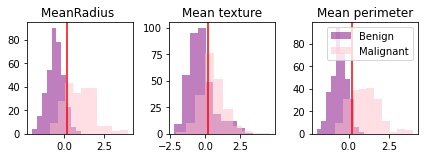

In [33]:
# Plotting the histograms and running a line through the threshold
# point.


fig = plt.figure()
j = 0

first = 1
last = 4

# After viewing the first 3 graphs, change the values of first and last
# as 4 and 7. Then, change again as 7 and 10, and so on until all attributes
# are reached.

# Create a loop to iterate though different attributes via their histograms

for i,b in enumerate(list(data_normalized.columns[first:last])):
    j = first - 1
    
    i += 1
    
    # Add subplot to add two plots and index it using 'i'
    ax = fig.add_subplot(2,3,i)
    threshold = [0.2,0.07,0.317,0.146,0.489,0.291,0.086,0.039,0.858,1.47,0.041,6.74,-0.043,-0.037,4.925,-0.096,0.043,-0.011,2.86,9.90,0.07,0.577,0.208,-0.021,0.71,0.157,0.195,0.456,0.840,0.699]
    
    # Plot histogram via their attributes using stacked and alpha
    # parameters for comparisons.
    ax.hist(data_benign[b], label = 'Benign', stacked = True, alpha=0.5, color= 'purple')
    ax.hist(data_malignant[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'pink')
    plt.axvline(x=threshold[j],color='red')
    j = j + 1
    ax.set_title(b)

plt.tight_layout()
plt.legend()
plt.show()
